# Morgan & Morgan Business Analyst Evaluation

In this notebook, you will find insights and analyses on revenue, profit, expenses, and employee performance. This analysis will look into how each department and office is performing, within the past three years and find that

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#loading sheets
settle= pd.read_excel('Business Analyst Evaluation.xlsx',sheet_name='Settlement Data')
emp=pd.read_excel('Business Analyst Evaluation.xlsx',sheet_name='Employee Data')

## 1. Department's total revenue and average fee from 2019 to 2021

Below you will find two tables that measure growth. One is the total revenue which was calculated by adding all the Settlement Amounts per department and separated by year and the average fee which is measured by plotting the mean for each department and separated by year. 

In [3]:
#merging tables to measue growth over year
growth=pd.merge(emp,settle,left_on='Employee ID',right_on='Handling Attorney: Employee ID')\
[['Resolution Date','Case Expenses','Settlement Amount','Department','Office']]

In [4]:
#Creating nesessary features like profit to measure growth
growth=pd.merge(emp,settle,left_on='Employee ID',right_on='Handling Attorney: Employee ID')[['Resolution Date','Case Expenses','Settlement Amount','Department','Office']]
growth['month_year']=pd.DatetimeIndex(pd.to_datetime(growth['Resolution Date'],format='%Y%m%d')).to_period('M').to_timestamp()
growth['year']=pd.DatetimeIndex(pd.to_datetime(growth['Resolution Date'],format='%Y%m%d')).year
growth['profit']=growth['Settlement Amount']-growth['Case Expenses']

### Total Revenue 

In [5]:
#Calculating the total revenue per department
total_revenue=pd.melt(growth.groupby(['Department','year']).sum().T)
total_revenue.value=[int(i) for i in round(total_revenue.value/1000000)]

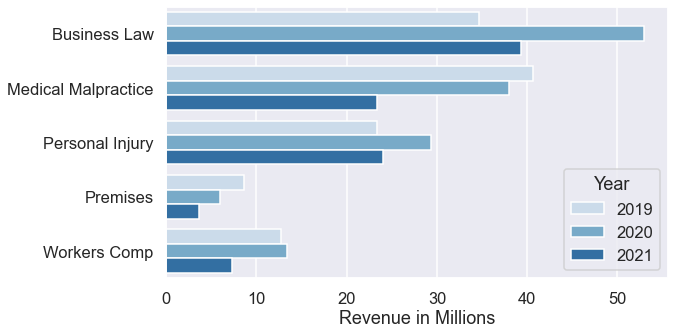

In [6]:
sns.set('talk')
plt.figure(figsize=(9,5))
ax=sns.barplot(
    y='Department',x='value',hue='year',data=total_revenue,ci=None,dodge = True,
    palette="Blues")\
    .set(xlabel='Revenue in Millions',ylabel='')
plt.legend(title='Year')
plt.savefig('yavgtot',transparent=True,bbox_inches='tight')

This table shows a decrease in revenue in all departments. It is to note that the year 2021 is not over and may show a potential improvement in some categories. 

Overall Business Law has provided the most revenue for Morgan & Morgan in this 3 year period. There is a decline for 2021 but overall is more than most departments. One department to note is Premises, this department shows a steady decline over the years which according to [law.com](https://www.law.com/texaslawyer/2020/01/21/premises-liability-cases-are-becoming-increasingly-difficult-to-win-and-heres-why/) Premises lawsuits are "increasingly difficult to win".

### Average Fee

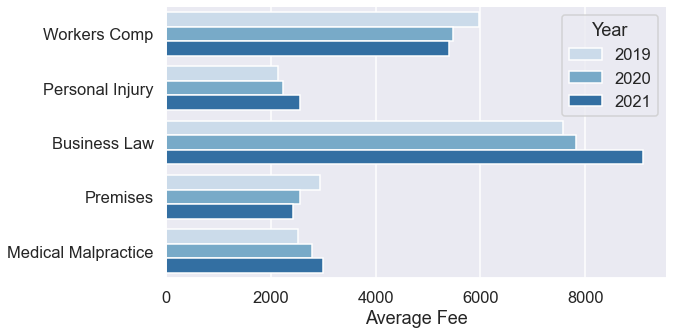

In [7]:
sns.set('talk')
ax=sns.catplot(
    y='Department',x='Case Expenses',ci=None,hue='year',data=growth,
    kind='bar',dodge = True,aspect=2,palette="Blues", legend_out=False)\
    .set( xlabel='Average Fee',ylabel='')
plt.legend(title='Year')
plt.savefig('yavgex',transparent=True)

Looking at our average fee graphs, Business Law stands out. There is a significant increase over the years in its average, although, compared to its profit graph it maintains its proportions. This increase can be explained due to a rise in litigation costs. According to this article published in 2019 from [Verisk](https://www.verisk.com/insurance/visualize/litigation-insights-offer-the-key-to-rising-claim-costs/), it has predicted the rise of cost for ligation. This can also be reflected in Personal Injury and Medical Malpractice. 


## 2. Office's year-over-year growth in Revenue.

In this section, we will see the year-over-year growth in each Office's revenue over the years. We will focus on growth or decline on each.

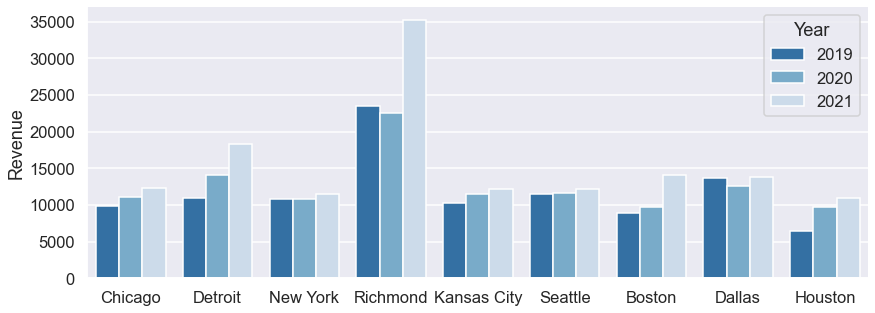

In [8]:
sns.set('talk')
ax=sns.catplot(
    x='Office',y='Settlement Amount',hue='year',data=growth,dodge = True,ci=None,kind='bar',
    aspect=2.5,palette="Blues_r", legend_out=False)\
    .set( ylabel='Revenue',xlabel='')
plt.legend(title='Year')
plt.savefig('yrovyr',transparent=True)

The most outstanding growth has been experienced by the office in Richmond in 2021. Offices like Chicago, Houston, Detroit, and Boston do show a steady increase in revenue over the years. When it comes to offices like New York and Seattle maintain a slight variation most of them having minor increase in revenue from 2019 to 2020.

## 3. Detailed analysis of which departments or offices the firm should expand or scale back.

In this section, we will see in-depth what Morgan and Morgan can expand or scale back in order to improve its profits. 

### Departments

In [9]:
#Merging tables and extracting necessary columns 
exp_scale=pd.merge(emp,settle,left_on='Employee ID',right_on='Handling Attorney: Employee ID')\
[['Hire Date','Resolution Date','Handling Attorney Name',"Office","Department",'Settlement Amount','Case Expenses','Case Number']]

In [10]:
#Creating necessary features for graphs and analysis 
exp_scale['profit']=exp_scale['Settlement Amount']-exp_scale['Case Expenses']
exp_scale['month_year']=pd.DatetimeIndex(pd.to_datetime(exp_scale['Resolution Date'],format='%Y%m%d')).to_period('M').to_timestamp()
exp_scale['year']=pd.DatetimeIndex(pd.to_datetime(exp_scale['Resolution Date'],format='%Y%m%d')).year

In [11]:
#Extractinc departments to compare 
dep_scale=exp_scale.loc[
    [i for i in exp_scale.index if exp_scale.Department[i] in ['Workers Comp','Premises','Medical Malpractice']]
    ]

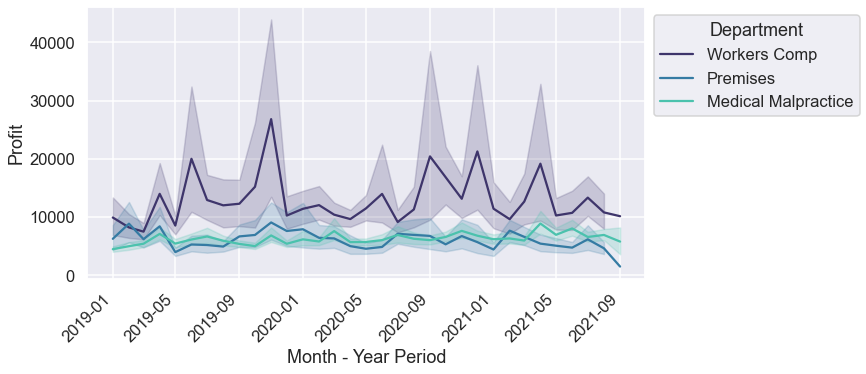

In [12]:
palette = sns.color_palette("mako", 3)
plt.figure(figsize=(10,5))
sns.lineplot(x='month_year',y='profit', hue='Department', data= dep_scale,palette=palette,)
plt.xlabel('Month - Year Period')
plt.ylabel('Profit')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Department',bbox_to_anchor=(1, 1), loc=2)
plt.savefig('mthrev',transparent=True, bbox_inches='tight')

We are able to see each department’s profit over the span of each month for every year. We can see that Workers Comp shows the greatest profit margins in contrast with Premises and Medical Malpractice. 

Workers Comp is a department that shows spikes in profit during Fall/Winter periods and it’s an area that can show an increase in profit with more investment and expansion, the exception to this trend is during 2020 but that reflects the state of the pandemic during that period.

Premises show the least growth, only having a brief period during the end of 2019. As stated before research shows that premise cases are harder to win and looking at beginning of 2021 it shows a steeper decline. Scaling back on Premises can help improve profits and reduce the fees that take to win those cases. 

Medical Malpractice just like Premises shows a decline in 2021 but there may be a place to focus on since according to [phisitianspractice.com](https://www.physicianspractice.com/view/taxes-could-be-rising-what-can-physicians-do-about-it-) Medical Malpractice settlements are on the rise with 41 states reporting verdicts greater than $10 million during the last six years.


### Offices

In [13]:
#Removing outliers from settlement amounts
of_dist=growth[growth['Settlement Amount']<100000]

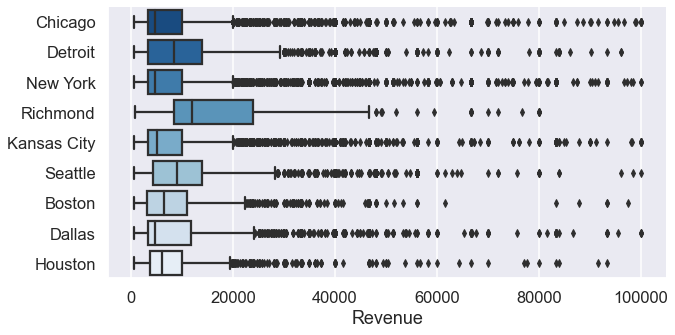

In [14]:
ax=sns.catplot(
    y='Office',x='Settlement Amount',data=of_dist,dodge = True,kind='box',aspect=2,
    palette="Blues_r", legend_out=False)
plt.xlabel('Revenue')
plt.ylabel('')
plt.title('')
plt.savefig('dens_rev',transparent=True, bbox_inches='tight')

Focusing on each office's revenue we are able to look at the average revenue for each as well as any potential revenue we can obtain. Looking at Richmond it shows a great revenue average in comparison with the other offices.

An office like Detroit and Boston shows promising potential by looking at its average and outliers and could benefit from expansion.

The Houston office shows low averages and not that many outliers this shows a steady revenue for the location. 

We will look into more in detail these findings below. 


In [15]:
#Extractinc Offices to compare 
of_scale=exp_scale.loc[
    [i for i in exp_scale.index if exp_scale.Office[i] in ["Richmond", "Houston", 'Detroit',"Kansas City"]]
    ]

In [16]:
#Creating readable labels
of_scale=of_scale.sort_values('month_year')
xticks=[str(i)[:7]for i in list(set(of_scale.month_year))]
xticks.sort()

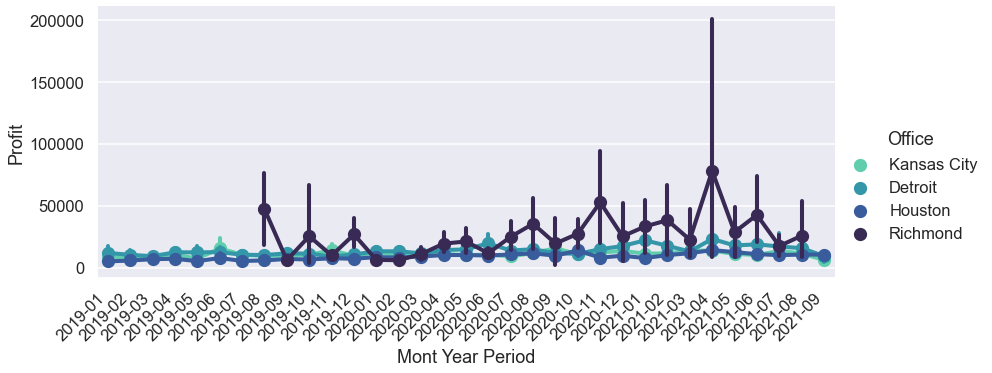

In [17]:
palette = sns.color_palette("mako_r", 4)
sns.catplot(
    x='month_year',y='Settlement Amount', hue='Office', aspect=2.5,kind='point',
    palette=palette,data= of_scale)
locs, labels=plt.xticks()
plt.xticks(locs,xticks, rotation=45, horizontalalignment='right')
plt.xlabel('Mont Year Period')
plt.ylabel('Profit')
plt.savefig('off_prof',transparent=True, bbox_inches='tight')
plt.show()

Looking at each office’s profit over time Richmond stands out with great profit margins. We can see in April of 2021 had the most revenue on average and its overall incline in revenue shows great potential.

An office that could benefit from expansion is the Detroit Office. Looking at its revenue over time we can see growth during the end of 2020 through 2021.

When making the decision to scale back, the Houston office is the one that shows a stagnant profit margin with barely any variance overall.


## 4. Attorneys on Performance Improvement Plan

In this section, we are looking for any attorneys that should be put on a PIP (Performance Improvement 
Plan) and what additional information would help you better answer this question.
We will use the 'Profit Percent' to measure performance. The Profit Percent is the percentage of profit that we obtained from the Settlement Amount.


In [18]:
#Merging necessary tables to measure employee performance
performance=pd.merge(emp,settle,left_on='Employee ID',right_on='Handling Attorney: Employee ID')\
[['Hire Date','Handling Attorney Name','Department',"Case Number",'Settlement Amount','Case Expenses']]

In [19]:
#Cleaning and creating features that will be used for graphs and meausre performance
performance['profit']=round(performance['Settlement Amount']-performance['Case Expenses'],2)
performance['Profit Percent']=round((performance['profit']*100)/performance['Settlement Amount'])
performance['years working']=2021-pd.DatetimeIndex(pd.to_datetime(performance['Hire Date'],format='%Y%m%d')).year

In [20]:
#selecting the lowest performing Attorneys
low_perf=performance.groupby('Handling Attorney Name').mean().reset_index().sort_values(by=['Profit Percent']).head(10)
low_perf.profit=pd.to_numeric(round(low_perf['profit']), downcast='integer')

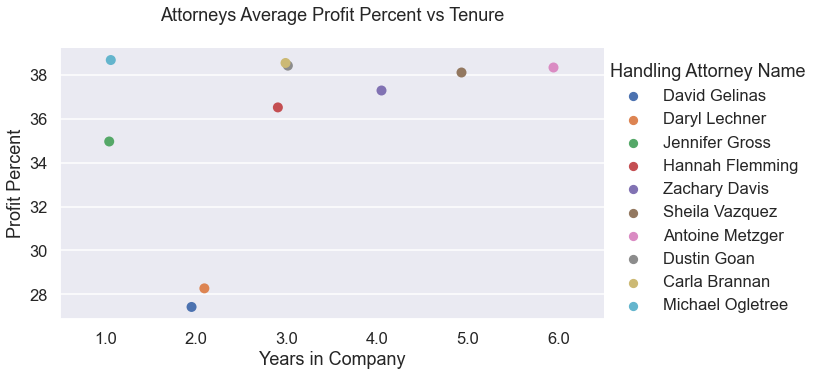

In [21]:
ax=sns.catplot(
    x='years working',y='Profit Percent',hue='Handling Attorney Name',s=10, aspect=1.8,
    data=low_perf,legend_out=True)
plt.xlabel('Years in Company')
plt.title('Attorneys Average Profit Percent vs Tenure''\n')
plt.show()

Looking at the Attorney's profit percentage, we can see that David and Daryl stand out. Although they have been in the firm for 2 years, their profit is below 30%. This can negatively impact the firm and should be looked into more detail. Another person to note would be Hanna Flemming, this Attorney has been in the company for a long time as well with a profit percentage of less than 38%.

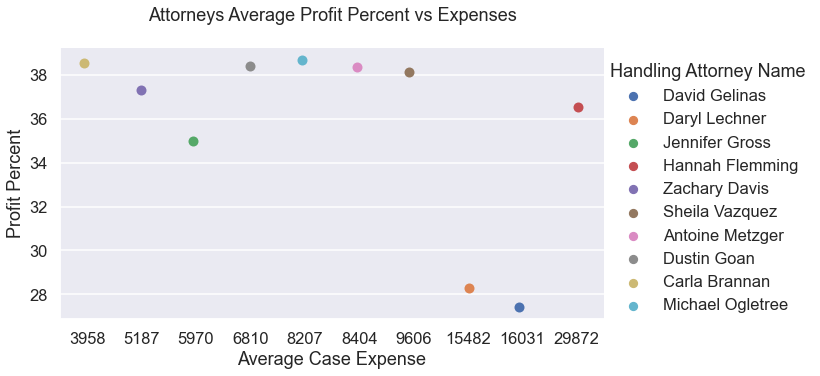

In [22]:
sns.catplot(data=low_perf, x="Case Expenses", y="Profit Percent",s=10,aspect=1.8,hue="Handling Attorney Name")
plt.xlabel('Average Case Expense')
locs, labels=plt.xticks()
xticks=[round(float(str(l)[12:-2]))for l in labels]
plt.xticks(locs,xticks)
plt.title('Attorneys Average Profit Percent vs Expenses''\n')
plt.show()

Looking at the previous mentioned attorneys we can see that David, Daryl, and Hannah show the highest average case expenses exceeding $15,000 which is well above the average expense for the department that they work for which is Business Law which can negatively impact the office that they work for and increase the average for budgeting.

**Conclusion and Recommendations**

The attorneys that should be placed on PIP (Performance Improvement Plan) should be:
* David Gelinas
* Daryl Lechner
* Hannah Flemming

Due to the fact that their Average Profit Percent is lower than 38% with having tenure of 2 years or more and average case expenses of more than $15,000.00.

For recommendations would be to audit attorney's expenses to find the reason of the over expense and create a tailored budget for each attorney that can maintain a reasonable expense amount depending on each attorneys needs and be able to raise the revenue percentage that they bring to the firm.
